# Tutorial on Grover's Algorithm (4)
## Solution for the Boolean Satisfiability Problem (SAT)
***

### The 2023 World Congress in Computer Science, Computer Engineering, & Applied Computing (CSCE'23)
### The 2nd International Conference on Emergent Quantum Technologies (ICEQT'23)

### July 24-27 2023 Las Vegas, NV
By Leon Deligiannidis, Ph.D.,
School of Computing and Data Science,
Wentworth Institute of Technology,
Boston, MA.
***



Source: https://learn.qiskit.org/course/introduction/grovers-search-algorithm

In [ ]:
!pip install qiskit[visualization]
!pip install tweedledum

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
#from qiskit.circuit.library import MCXGate 

print("Imports Successful")

Imports Successful


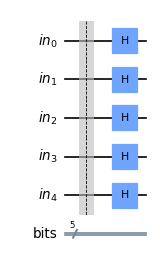

In [2]:
n_qbits = 5
scale=0.6  # scale factor for drawing the circuits

q = QuantumRegister(n_qbits, name='in')
c = ClassicalRegister(n_qbits, "bits")
circuit= QuantumCircuit(q, c)

circuit.barrier()
circuit.h(q)

circuit.draw('mpl', scale=scale)

## DIMACS-CNF format
- Lines that begin with    <B>c</B>     are comments and can be ignored
- Lines that begin with    <B>p</B>     specify the type of the problem
  
- <B>p cnf 5 4</B> means that we have a problem in <i>Conjunctive Normal Form</i> with
   4 clauses and 5 variables  (variables 1 2 3 4 and 5)
- The file we will desribe here is shown below:
```
c example DIMACS-CNF 5-SAT
p cnf 5 4
4 -5 0
1 0
2 0
3 0
```
- The clause:  3 0 <BR>
   indicates that this clause to be satisfied, variable 3 MUST be true (1)
- The 0 indicates the end of the line.

- The clause: 4 -5 0 <BR>
indicates that for this clause to be satisfied, variable 4 must be true OR variable 5 must be False (negative numbers indicate that the variable must be false)  <BR>In other words, this clause is NOT satisfied if 4 is false AND 5 is true.<BR>
All clauses must be satisfied for the problem to be satisfied. This file describes the following: <B>(4 OR !5) AND 1 AND 2 AND 3</B> <BR>
<P>
    <B>Which binary strings satisfy our problem? Hint: there are 3 solutions.  </B>    
<P>
* DIMACS CNF format: https://jix.github.io/varisat/manual/0.2.0/formats/dimacs.html
* Conjunctive normal form: https://en.wikipedia.org/wiki/Conjunctive_normal_form


In [1]:
# Below are the contents of the My_SAT.dimacs file.
'''
c example DIMACS-CNF 5-SAT
p cnf 5 4
4 -5 0
1 0
2 0
3 0
'''

SAT_File='My_SAT.dimacs'

with open(SAT_File, 'r', encoding='utf8') as f:
    dimacs = f.read()
print(dimacs)  # let's check the file is as promised

c example DIMACS-CNF 5-SAT
p cnf 5 4
4 -5 0
1 0
2 0
3 0



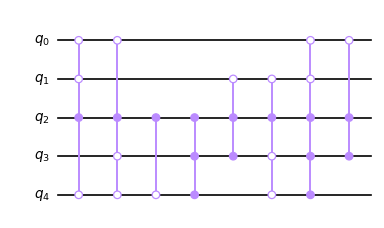

In [4]:
#
# must have done this:            pip install tweedledum
#
from qiskit.circuit.library import PhaseOracle
oracle = PhaseOracle.from_dimacs_file(SAT_File)
oracle.draw('mpl', scale=scale)

Number of iterations 2. Total elements in database: 32, Solutions: 3 (iterations: 2.565099660323728)


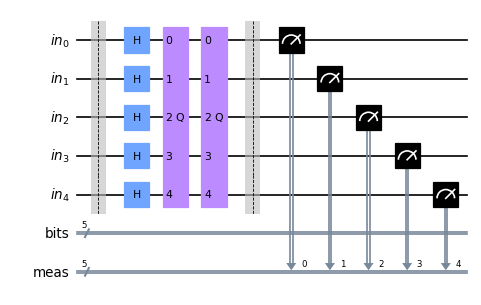

In [5]:
from qiskit.circuit.library import GroverOperator
grover_operator = GroverOperator(oracle, insert_barriers=True, name='Q')


n_solutions = 3     # Our Oracle detects 3 strings (see paper at CSCE'23)


itrs=(np.pi/4.0) * np.sqrt((2**n_qbits)/n_solutions)       # Number of iterations depends on number of solutions!
my_iters = int(itrs)
print(f"Number of iterations {my_iters}. Total elements in database: {2**n_qbits}, Solutions: {n_solutions} (iterations: {itrs})")

for i in range(my_iters):
     circuit.compose(grover_operator, inplace=True)


circuit.measure_all()
circuit.draw('mpl', scale=scale)

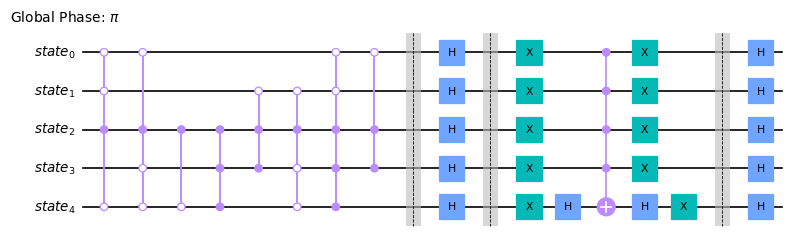

In [6]:
grover_operator.decompose().draw('mpl', scale=scale)

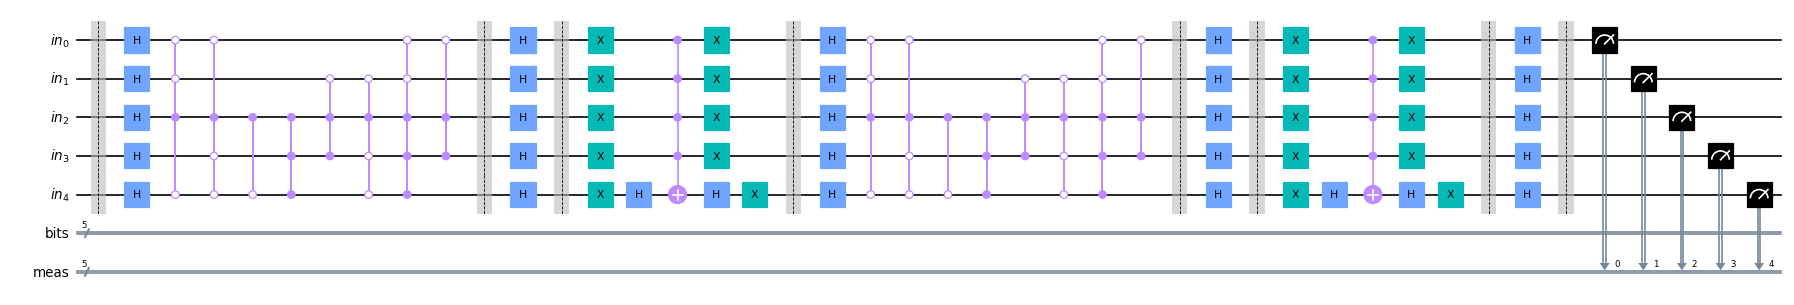

In [7]:
circuit.decompose("Q").draw('mpl', scale=scale, plot_barriers=True, fold=60)
#circuit.decompose("Q").draw('mpl', scale=scale, plot_barriers=False)

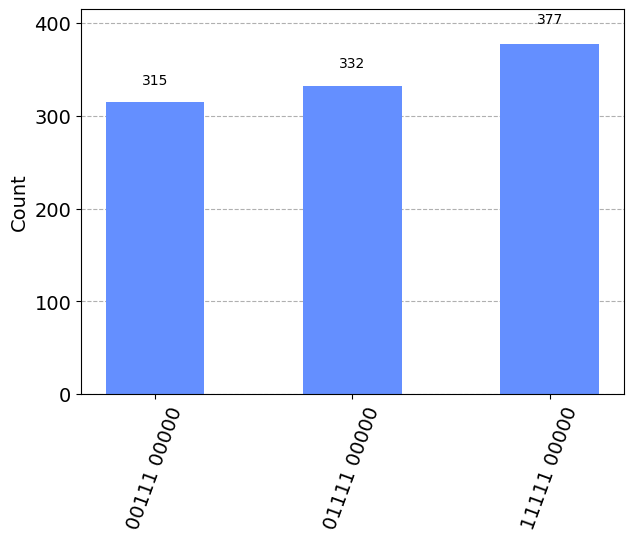

In [8]:
# Simulate the circuit
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(circuit, sim)
counts = sim.run(t_qc).result().get_counts()

# plot the results
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [9]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright